In [1]:
import pandas as pd
import numpy as np
import logging
import sys
import os
import scipy
from sklearn import linear_model
from sklearn.metrics import  mean_squared_error
pd.options.display.max_rows = 999
pd.set_option('display.max_columns',500)

from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In [2]:
N = 15
D = 100
mu = np.random.uniform(0,1, size=(N))
x = np.tile(mu[:,None], (1, D)) + 0.01*np.random.randn(N, D)
y = np.random.randn(N)
xbias = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)

In [3]:
W = np.dot(np.dot(np.linalg.inv(np.dot(xbias.T,xbias)),xbias.T),y)

In [4]:
y_pred = np.dot(W,xbias.T)

In [5]:
print(xbias.shape)
print(y.shape)
print(W.shape)

(15, 101)
(15,)
(101,)


In [6]:
sqrt(mean_squared_error(y, y_pred))

3.0192151149939415

In [7]:
regr = linear_model.LinearRegression()

In [8]:
regr.fit(X=xbias, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
regr.intercept_

0.24700837479791315

In [10]:
W[0]

-0.049050517424163886

In [11]:
y_pred_rgr = regr.predict(xbias)

In [12]:
y_pred[0:5]

array([-3.06825702, -1.37678564, -5.64253089, -5.46458522, -6.5023384 ])

In [104]:
y_pred_rgr[0:5]

array([-1.34478953, -0.71357561, -2.30758016, -0.08665059, -0.06376502])

In [13]:
mean_squared_error(y_pred=y_pred, y_true=y)

9.1156599106078779

In [14]:
mean_squared_error(y_pred=y_pred_rgr, y_true=y)

2.4366087460319155e-29

In [15]:
flights = sns.load_dataset("flights")

In [16]:
flights = flights.pivot("month", "year", "passengers")


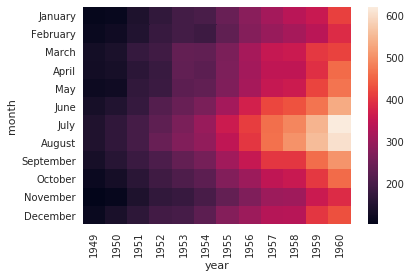

In [17]:
ax = sns.heatmap(flights)

In [21]:
nonbias = W[1:]

In [22]:
nonbias.shape

(100,)

In [23]:
nonbias = np.reshape(a=nonbias,newshape=(10,10))

In [24]:
nonbias.shape

(10, 10)

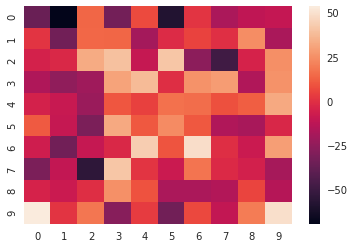

In [25]:
sns.heatmap(nonbias)